In [348]:
import colorcet as cc
import numpy as np
import matplotlib.pyplot as plt

Set coefficients for cost function ($f(x, y) = ax^2 + by^2$) with ellipsoidal level sets

In [384]:
a = 1
b = 3

Number of iterations for gradient descent

In [385]:
num_iter = 10

The cost function (*note*: using a lambda function automatically vectorizes with numpy)

In [388]:
f = lambda x, y: a*x**2 + b*y**2

The partial derivatives: $\partial f/\partial x = 2ax$ and $\partial f/\partial y = 2by$ (or $f_x$ and $f_y$)

In [389]:
fx = lambda x: 2*a*x
fy = lambda y: 2*b*y

Exact line search parameter $\alpha = \alpha(x, y)$

In [390]:
alpha = lambda x, y: (a**2*x**2 + b**2*y**2)/(2*a**3*x**2 + 2*b**3*y**2)

Start our iteration at $(x_0, y_0) = (3, 2)$

In [391]:
x0, y0 = 3, 2
X, Y, F = [x0], [y0], [f(x0, y0)]

Run gradient descent for `num_iter` iterations

In [392]:
for _ in range(num_iter):
    x_k, y_k = X[-1], Y[-1]
    X.append(x_k - alpha(x_k, y_k)*fx(x_k))
    Y.append(y_k - alpha(x_k, y_k)*fy(y_k))
    F.append(f(X[-1], Y[-1]))

Use meshgrid to sample the cost function so that we can plot its level sets

*Note*:
- need to choose `n_grid` large enough to make sure the level sets appear smooth and not polygonalized (try w/ `n_grid = 50` to see the problem)
- use `indexing='xy'` to orient `x_grid` and `y_grid` correctly (default is `indexing='ij'` which uses "matrix indexing" convention)

In [394]:
n_grid = 301
x_grid, y_grid = np.meshgrid(
    np.linspace(-3, 3, n_grid),
    np.linspace(-3, 3, n_grid),
    indexing='xy'
)
f_grid = f(x_grid, y_grid)

Make a plot of the gradient descent trajectory, the cost function, and the level sets passing through each iteration

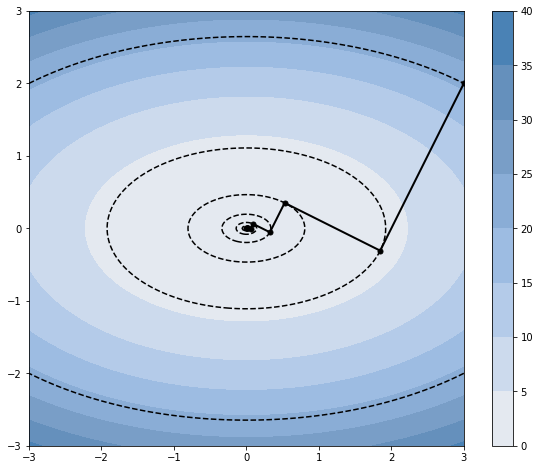

In [398]:
plt.figure(figsize=(10, 8))
plt.contourf(x_grid, y_grid, f_grid, cmap=cc.cm.blues)
plt.colorbar()
plt.contour(x_grid, y_grid, f_grid, levels=sorted(F), colors='k', linestyles=['--'])
plt.plot(X, Y, linewidth=2, c='k', marker='.', markersize=10)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal')
plt.show()

Two ways to evaluate how well we've converged:

1. plot the difference in the function value---in this case, true value is just $f(0, 0) = 0$
2. plot the $\ell_2$-norm distance between successive iterations in a loglog plot

For the second option, makes sense to plot the relative error

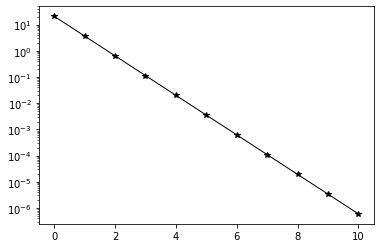

In [381]:
plt.figure()
plt.semilogy(F, linewidth=1, marker='*', c='k')
plt.show()

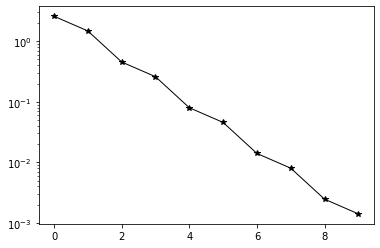

In [383]:
dX = np.subtract(X[1:], X[:-1])
dY = np.subtract(Y[1:], Y[:-1])

plt.figure()
plt.semilogy(np.sqrt(dX**2 + dY**2), linewidth=1, marker='*', c='k')
plt.show()

There is kind of a zig-zag pattern here: this is because every other step is longer or shorter depending on the orientation of the gradient